In [1]:
from matplotlib import style

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
results = []

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column

results = session.query(Measurement.date, Measurement.prcp)
print(results.all())


[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

In [27]:
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2010-01-01  2010-01-01           0.08
2010-01-02  2010-01-02           0.00
2010-01-03  2010-01-03           0.00
2010-01-04  2010-01-04           0.00
2010-01-06  2010-01-06            NaN
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[19550 rows x 2 columns]


In [28]:
# Use Pandas Plotting with Matplotlib to plot the data+ get rid of the index
print(df.to_string(index=False))

       date  precipitation
 2010-01-01           0.08
 2010-01-02           0.00
 2010-01-03           0.00
 2010-01-04           0.00
 2010-01-06            NaN
 2010-01-07           0.06
 2010-01-08           0.00
 2010-01-09           0.00
 2010-01-10           0.00
 2010-01-11           0.01
 2010-01-12           0.00
 2010-01-14           0.00
 2010-01-15           0.00
 2010-01-16           0.00
 2010-01-17           0.00
 2010-01-18           0.00
 2010-01-19           0.00
 2010-01-20           0.00
 2010-01-21           0.00
 2010-01-22           0.00
 2010-01-23           0.00
 2010-01-24           0.01
 2010-01-25           0.00
 2010-01-26           0.04
 2010-01-27           0.12
 2010-01-28           0.00
 2010-01-30            NaN
 2010-01-31           0.03
 2010-02-01           0.01
 2010-02-03            NaN
 2010-02-04           0.01
 2010-02-05           0.00
 2010-02-06           0.00
 2010-02-07           0.00
 2010-02-08           0.00
 2010-02-09           0.00
 

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2010-01-01           0.08
 2010-01-01           0.21
 2010-01-01           0.15
 2010-01-01           0.15
 2010-01-01           0.05
 2010-01-01           0.14
 2010-01-01           0.28
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-02           0.02
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-02           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-03           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.00
 2010-01-04           0.01
 2010-01-05           0.00
 2010-01-05           0.00
 2010-01-05           0.02
 2010-01-05           0.00
 2010-01-05           0.00
 2010-01-05           0.01
 2010-01-06           0.08
 2010-01-06           0.01
 

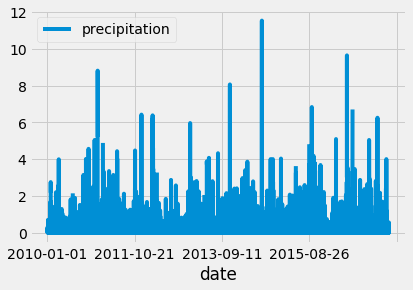

In [33]:
df.plot()

In [35]:
# How many stations are available in this dataset?
df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [36]:
session.query(func.count(Station.station)).all()

[(9)]

In [37]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [41]:
#Convert the Temperature Observation Results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


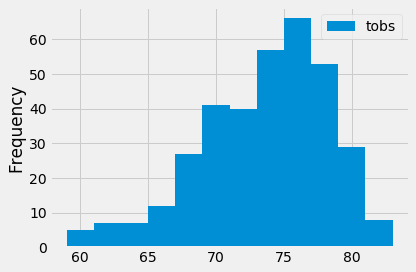

In [42]:
#Plot the Temperature Observations
df.plot.hist(bins=12)
plt.tight_layout()

In [62]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
            filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


# Challenge

In [68]:
#Identify key statistical data in June across all of the stations and years using the describe() function.
#Key statistical data in June
# Design a query to retrieve the last 12 months of temperature data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and temperature scores
results = []
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.tobs)
print(results.all())

[('2010-01-01', 65.0), ('2010-01-02', 63.0), ('2010-01-03', 74.0), ('2010-01-04', 76.0), ('2010-01-06', 73.0), ('2010-01-07', 70.0), ('2010-01-08', 64.0), ('2010-01-09', 68.0), ('2010-01-10', 73.0), ('2010-01-11', 64.0), ('2010-01-12', 61.0), ('2010-01-14', 66.0), ('2010-01-15', 65.0), ('2010-01-16', 68.0), ('2010-01-17', 64.0), ('2010-01-18', 72.0), ('2010-01-19', 66.0), ('2010-01-20', 66.0), ('2010-01-21', 69.0), ('2010-01-22', 67.0), ('2010-01-23', 67.0), ('2010-01-24', 71.0), ('2010-01-25', 67.0), ('2010-01-26', 76.0), ('2010-01-27', 68.0), ('2010-01-28', 72.0), ('2010-01-30', 70.0), ('2010-01-31', 67.0), ('2010-02-01', 66.0), ('2010-02-03', 67.0), ('2010-02-04', 69.0), ('2010-02-05', 67.0), ('2010-02-06', 67.0), ('2010-02-07', 64.0), ('2010-02-08', 69.0), ('2010-02-09', 73.0), ('2010-02-11', 73.0), ('2010-02-12', 69.0), ('2010-02-13', 69.0), ('2010-02-14', 69.0), ('2010-02-15', 71.0), ('2010-02-16', 61.0), ('2010-02-17', 69.0), ('2010-02-19', 63.0), ('2010-02-20', 64.0), ('2010-02

In [69]:
#Identify key statistical data in December across all stations and years using the describe() function.
#Getting month of June all years. use as integer
#june=6
#filter out data that is older than a year from last record date
results = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 6).all()
#add function that extracts all results from query and put to list
#results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date == june).all()
print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [65]:
december=pd.DataFrame(results, columns=['date','temperature'])
december.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [66]:
#Getting month of December. use as integer
#december=12
#filter out data that is older than a year from last record date
results = session.query(Measurement.date, Measurement.tobs).filter(func.extract('month', Measurement.date) == 12).\
    filter(Measurement.date >= prev_year).all()
#add function that extracts all results from query and put to list
#results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date == june).all()
#print(results)

In [67]:
dec_one_year=pd.DataFrame(results, columns=['date','temperature'])
dec_one_year.describe()

,temperature
count,200.000000
mean,71.130000
std,3.419292
min,60.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,78.000000
